# Jan 13, 20 Keras Multi-class reuter with one-hot embedding
* Name: Jikhan Jeong
* Ref: https://nbviewer.jupyter.org/github/fchollet/deep-learning-with-python-notebooks/blob/master/3.6-classifying-newswires.ipynb

# Multi-classes : 46 Categories
* In a single-label, multi-class classification problem, your network should end with a softmax activation, so that it will output a probability distribution over the N output classes.
Categorical crossentropy is almost always the loss function you should use for such problems. It minimizes the distance between the probability distributions output by the network, and the true distribution of the targets.
* There are two ways to handle labels in multi-class classification: Encoding the labels via "categorical encoding" (also known as "one-hot encoding") and using categorical_crossentropy as your loss function. 

In [2]:
%tensorflow_version 1.x
import keras
keras.__version__

'2.2.5'

# Preparing the data

In [1]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)
# num_words=10000 restricts the data to the 10,000 most frequently occurring words found in the data.

Using TensorFlow backend.


2113536/2110848 [==============================] - 1s 0us/step


In [2]:
len(train_data)

8982

In [3]:
len(test_data)

2246

In [0]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

In [14]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [15]:
x_train.shape
# 8982 sentences
# 10000 embedding

(8982, 10000)

In [16]:
x_test.shape
# 2246 sentences
# 10000 embedding  dim

(2246, 10000)

In [0]:
import numpy as np
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

# Our vectorized training labels
one_hot_train_labels = to_one_hot(train_labels)
# Our vectorized test labels
one_hot_test_labels = to_one_hot(test_labels)

In [0]:
# Built-in
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

# Building neural network

In [8]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [0]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# categorical_crossentropy measures the distance between two probability distributions: 
# in our case, between the probability distribution output by our network, and the true distribution of the label

# Validating our approach

In [17]:
x_train.shape

(8982, 10000)

In [0]:
x_val = x_train[:1000]               # Training subset
y_val = one_hot_train_labels[:1000]

partial_x_train = x_train[1000:]     # Validation set
partial_y_train = one_hot_train_labels[1000:]

In [19]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 7982 samples, validate on 1000 samples
Epoch 1/20





7982/7982 [==============================] - 10s 1ms/step - loss: 2.6745 - acc: 0.5400 - val_loss: 1.7720 - val_acc: 0.6390
Epoch 2/20
7982/7982 [==============================] - 0s 49us/step - loss: 1.4480 - acc: 0.7017 - val_loss: 1.3149 - val_acc: 0.7140
Epoch 3/20
7982/7982 [==============================] - 0s 48us/step - loss: 1.0545 - acc: 0.7740 - val_loss: 1.1447 - val_acc: 0.7470
Epoch 4/20
7982/7982 [==============================] - 0s 49us/step - loss: 0.8267 - acc: 0.8242 - val_loss: 1.0345 - val_acc: 0.7680
Epoch 5/20
7982/7982 [==============================] - 0s 49us/step - loss: 0.6561 - acc: 0.8632 - val_loss: 0.9655 - val_acc: 0.7920
Epoch 6/20
7982/7982 [==============================] - 0s 48us/step - loss: 0.5212 - acc: 0.8908 - val_loss: 0.9898 - val_acc: 0.7920
Epoch 7/20
7982/7982 [==================

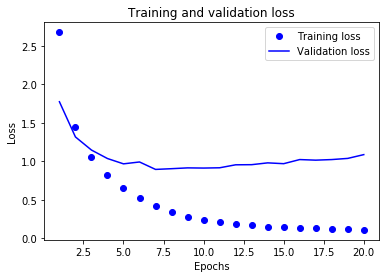

In [20]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

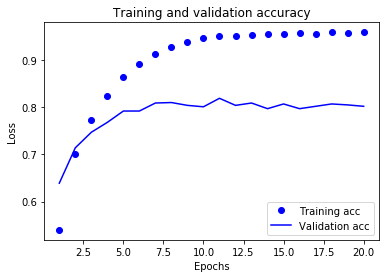

In [21]:
plt.clf()   # clear figure

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Evaulation of Training Set
* Epoch = 8 is the optimal 
* After 8 is overfitting

# Test Set

In [22]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=8, ################ Optimal Epochs 
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels) ## Evaluation with test set
# The following results is training set

Train on 7982 samples, validate on 1000 samples
Epoch 1/8
7982/7982 [==============================] - 1s 71us/step - loss: 2.6619 - acc: 0.5025 - val_loss: 1.7387 - val_acc: 0.6360
Epoch 2/8
7982/7982 [==============================] - 0s 50us/step - loss: 1.4251 - acc: 0.7061 - val_loss: 1.2895 - val_acc: 0.7130
Epoch 3/8
7982/7982 [==============================] - 0s 50us/step - loss: 1.0488 - acc: 0.7727 - val_loss: 1.1168 - val_acc: 0.7490
Epoch 4/8
7982/7982 [==============================] - 0s 48us/step - loss: 0.8263 - acc: 0.8210 - val_loss: 1.0232 - val_acc: 0.7710
Epoch 5/8
7982/7982 [==============================] - 0s 52us/step - loss: 0.6556 - acc: 0.8632 - val_loss: 0.9301 - val_acc: 0.8010
Epoch 6/8
7982/7982 [==============================] - 0s 48us/step - loss: 0.5255 - acc: 0.8909 - val_loss: 0.9104 - val_acc: 0.8130
Epoch 7/8
7982/7982 [==============================] - 0s 48us/step - loss: 0.4233 - acc: 0.9103 - val_loss: 0.8836 - val_acc: 0.8090
Epoch 8/8
2246

In [26]:
print(model.metrics_names) 

['loss', 'acc']


In [24]:
# Test acc approach reaches an accuracy of ~78%
results # testset loss and acc

[0.962723881245084, 0.7818343722172751]

# Generating predictions on new data

In [0]:
predictions = model.predict(x_test)

In [29]:
np.argmax(predictions[0]) # prediction results

3

In [32]:
np.argmax( one_hot_test_labels[0]) # the ground truth label 

3